## 底盘操作
### 导入库

In [1]:
import robomaster
import time
from robomaster import robot
from robomaster import conn
from MyQR import myqr #生成二维码
from PIL import Image #PIL图像操作库
from IPython.display import Image as IMG #IPython显示模块，在jupyter notebook中使用

### EP接入局域网
这一步操作尽量使用只有一个网卡的电脑，或者禁用其他网卡只保留一个网卡

如果你的EP已经加入局域网，这一步可以省略

line 16: mode: byte


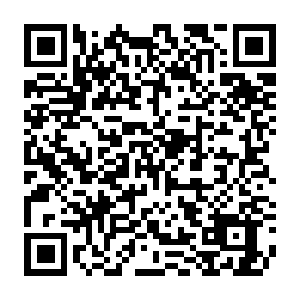

Connected!


In [6]:
QRCODE_NAME = "qrcode.png"
helper = conn.ConnectionHelper()
info = helper.build_qrcode_string(ssid="Xiaomi_CC65OT", password="435782572")
myqr.run(words=info)
#time.sleep(1)
display(Image.open(QRCODE_NAME).resize((300,300)))

if helper.wait_for_connection():
    print("Connected!")
    break
else:
    print("Connect failed!")

'''
#在pycharm可以尝试这段代码
helper = conn.ConnectionHelper()
info = helper.build_qrcode_string(ssid="RoboMaster_SDK_WIFI", password="12341234")
myqr.run(words=info)
time.sleep(1)
img = Image.open(QRCODE_NAME)
img.show()
if helper.wait_for_connection():
    print("Connected!")
else:
    print("Connect failed!")

'''

### 设置麦轮转速 
drive_speed(x=0.0, y=0.0, z=0.0,timeout=None)

In [10]:
ep_robot = robot.Robot()
ep_robot.initialize(conn_type="sta")

ep_chassis = ep_robot.chassis

# 指定麦轮速度
speed = 50
slp = 1

# 转动右前轮
ep_chassis.drive_wheels(w1=speed, w2=0, w3=0, w4=0)
time.sleep(slp)

# 转动左前轮
ep_chassis.drive_wheels(w1=0, w2=speed, w3=0, w4=0)
time.sleep(slp)

# 转动左后轮
ep_chassis.drive_wheels(w1=0, w2=0, w3=speed, w4=0)
time.sleep(slp)

# 转动右后轮
ep_chassis.drive_wheels(w1=0, w2=0, w3=0, w4=speed)
time.sleep(slp)

# 前进 3秒
ep_chassis.drive_wheels(w1=speed, w2=speed, w3=speed, w4=speed)
time.sleep(slp)

# 后退 3秒
ep_chassis.drive_wheels(w1=-speed, w2=-speed, w3=-speed, w4=-speed)
time.sleep(slp)

# 左移 3秒
ep_chassis.drive_wheels(w1=speed, w2=-speed, w3=speed, w4=-speed)
time.sleep(slp)

# 右移 3秒
ep_chassis.drive_wheels(w1=-speed, w2=speed, w3=-speed, w4=speed)
time.sleep(slp)

# 左转 3秒
ep_chassis.drive_wheels(w1=speed, w2=-speed, w3=-speed, w4=speed)
time.sleep(slp)

# 右转 3秒
ep_chassis.drive_wheels(w1=-speed, w2=speed, w3=speed, w4=-speed)
time.sleep(slp)

# 停止麦轮运动
ep_chassis.drive_wheels(w1=0, w2=0, w3=0, w4=0)

ep_robot.close()

### 设置底盘速度
drive_wheels(w1=0, w2=0, w3=0, w4=0, timeout=None)

In [15]:
ep_robot = robot.Robot()
ep_robot.initialize(conn_type="sta")

ep_chassis = ep_robot.chassis

x_val = 0.5
y_val = 0.3
z_val = 30

# 前进 3秒
ep_chassis.drive_speed(x=x_val, y=0, z=0, timeout=5)
time.sleep(3)

# 后退 3秒
ep_chassis.drive_speed(x=-x_val, y=0, z=0, timeout=5)
time.sleep(3)

# 左移 3秒
ep_chassis.drive_speed(x=0, y=-y_val, z=0, timeout=5)
time.sleep(3)

# 右移 3秒
ep_chassis.drive_speed(x=0, y=y_val, z=0, timeout=5)
time.sleep(3)

# 左转 3秒
ep_chassis.drive_speed(x=0, y=0, z=-z_val, timeout=5)
time.sleep(3)

# 右转 3秒
ep_chassis.drive_speed(x=0, y=0, z=z_val, timeout=5)
time.sleep(3)

# 停止麦轮运动
ep_chassis.drive_speed(x=0, y=0, z=0, timeout=5)

ep_robot.close()


### 控制底盘运动当指定位置
move(x=0, y=0, z=0, xy_speed=0.5, z_speed=30)

In [14]:
ep_robot = robot.Robot()
ep_robot.initialize(conn_type="sta")

ep_chassis = ep_robot.chassis

x_val = 0.5
y_val = 0.6
z_val = 90

# 前进 0.5米
ep_chassis.move(x=x_val, y=0, z=0, xy_speed=0.7).wait_for_completed()

# 后退 0.5米
ep_chassis.move(x=-x_val, y=0, z=0, xy_speed=0.7).wait_for_completed()

# 左移 0.6米
ep_chassis.move(x=0, y=-y_val, z=0, xy_speed=0.7).wait_for_completed()

# 右移 0.6米
ep_chassis.move(x=0, y=y_val, z=0, xy_speed=0.7).wait_for_completed()

# 左转 90度
ep_chassis.move(x=0, y=0, z=z_val, z_speed=45).wait_for_completed()

# 右转 90度
ep_chassis.move(x=0, y=0, z=-z_val, z_speed=45).wait_for_completed()

ep_robot.close()